In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor, LGBMClassifier, plot_tree
from sklearn.metrics import r2_score, f1_score, plot_confusion_matrix
import pickle5 as pickle
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import modelling
import numpy as np
from nilearn import plotting, datasets, surface  

In [ ]:
fsaverage_mesh_right = '/home/brunovieira/Tamires_Experiments/Bases_de_Dados/nki_data/fsaverage/surf/rh.pial'
fsaverage_thickness_right = '/home/brunovieira/Tamires_Experiments/Bases_de_Dados/nki_data/fsaverage/surf/rh.thickness'
fsaverage_annot_right = '/home/brunovieira/Tamires_Experiments/Bases_de_Dados/nki_data/fsaverage/label/rh.Eco.annot'
fsaverage_sulc_right = '/home/brunovieira/Tamires_Experiments/Bases_de_Dados/nki_data/fsaverage/surf/rh.avg_sulc' 
fsaverage_mesh_left = '/home/brunovieira/Tamires_Experiments/Bases_de_Dados/nki_data/fsaverage/surf/lh.pial'
fsaverage_thickness_left = '/home/brunovieira/Tamires_Experiments/Bases_de_Dados/nki_data/fsaverage/surf/lh.thickness'
fsaverage_annot_left = '/home/brunovieira/Tamires_Experiments/Bases_de_Dados/nki_data/fsaverage/label/lh.Eco.annot'
fsaverage_sulc_left = '/home/brunovieira/Tamires_Experiments/Bases_de_Dados/nki_data/fsaverage/surf/lh.avg_sulc'
m = pickle.load(open("/home/brunovieira/Tamires_Experiments/Outputs/exp1/finalized_model.sav",'rb'))

In [16]:
score_segmented = m.test('score_segmented')
our_econo = [2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]
all_econo = pd.Series(list(surface.load_surf_data(fsaverage_annot_right))).unique()

extras = list(set(all_econo) - set(our_econo))
extras = [[a,0.0001] for a in extras]

r2_right = score_segmented[38:]
r2_right = [[our_econo[i],b] for i, [a,b] in enumerate(r2_right)]
r2_right = r2_right + extras
a_right = pd.DataFrame(surface.load_surf_data(fsaverage_annot_right))
b_right = pd.DataFrame(r2_right).set_index(0)
result_right = a_right.join(b_right, on=0).rename(columns={0:'econo',1:'r2'})

r2_left = score_segmented[:38]
r2_left = [[our_econo[i],b] for i, [a,b] in enumerate(r2_left)]
r2_left = r2_left + extras
a_left = pd.DataFrame(surface.load_surf_data(fsaverage_annot_left))
b_left = pd.DataFrame(r2_left).set_index(0)
result_left = a_left.join(b_left, on=0).rename(columns={0:'econo',1:'r2'})

In [17]:
data_path = '/home/brunovieira/Tamires_Experiments/Notebooks/vizualizations_economo_model.csv'
data = pd.read_csv(data_path, index_col = 0)
data

,atlasEcono,Hemisphere,Lobe,Thickness at 10y.o.,Curvature,Layer I thickness,Layer II thickness,Layer III thickness,Layer IV thickness,Layer V thickness,Layer VI thickness,bigbrain_layer_1,r2.0,r2.1,r2.2,struture
0,10.0,0.0,1.0,3.062818,-0.313375,0.281784,0.229602,0.751425,0.177420,0.594878,0.657497,0.104651,0.912671,0.803229,0.952125,10.0
1,10.0,1.0,1.0,3.147825,-0.469413,0.289283,0.235712,0.771422,0.182141,0.610709,0.674994,0.104651,0.912671,0.803229,0.952125,10.0
2,11.0,0.0,1.0,2.800137,-3.634750,0.301370,0.234399,0.658549,0.178590,0.524607,0.569254,0.122172,0.874948,0.677615,0.873281,11.0
3,11.0,1.0,1.0,2.696021,-4.388162,0.296266,0.230429,0.647397,0.175565,0.515723,0.559614,0.122172,0.874948,0.677615,0.873281,11.0
4,12.0,0.0,1.0,2.824026,0.726567,0.303276,0.254361,0.694600,0.185879,0.498938,0.528287,0.123016,0.754384,0.401058,0.922505,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,7.0,1.0,1.0,2.676972,1.375297,0.255721,0.191791,0.630171,0.164392,0.493177,0.566240,0.111111,0.810530,0.543696,0.832220,7.0
72,8.0,0.0,1.0,3.020875,-1.686308,0.274902,0.208546,0.758350,0.170629,0.606680,0.625639,0.103943,0.857906,0.517506,0.905228,8.0
73,8.0,1.0,1.0,2.936077,-0.766446,0.262273,0.198966,0.723512,0.162790,0.578810,0.596898,0.103943,0.857906,0.517506,0.905228,8.0
74,9.0,0.0,1.0,3.158514,-3.270608,0.292620,0.225093,0.742806,0.213838,0.607750,0.641514,0.107438,0.665652,0.536378,0.738466,9.0


In [18]:
data_right = data[data.Hemisphere==0]
data_left = data[data.Hemisphere==1]

result_right = result_right.join(data_right.set_index('atlasEcono'), on='econo')
result_left = result_left.join(data_left.set_index('atlasEcono'), on='econo')
result_left

,econo,r2,Hemisphere,Lobe,Thickness at 10y.o.,Curvature,Layer I thickness,Layer II thickness,Layer III thickness,Layer IV thickness,Layer V thickness,Layer VI thickness,bigbrain_layer_1,r2.0,r2.1,r2.2,struture
0,2,0.27,1.0,1.0,2.830359,-1.492471,0.262659,0.217373,0.751749,0.153973,0.606833,0.652119,0.099315,-0.010000,-0.010000,-0.010000,2.0
1,34,0.44,1.0,5.0,2.692785,-1.171178,0.254379,0.227124,0.681373,0.218039,0.499673,0.508758,0.106464,0.965679,0.614689,0.984068,34.0
2,3,0.56,1.0,1.0,2.981383,0.822567,0.287459,0.222549,0.751104,0.148366,0.658375,0.630556,0.106529,0.581724,0.612679,0.836950,3.0
3,6,0.52,1.0,1.0,2.998591,-1.220507,0.293486,0.222645,0.708415,0.182164,0.546492,0.617334,0.114173,0.841967,0.778514,0.923312,6.0
4,3,0.56,1.0,1.0,2.981383,0.822567,0.287459,0.222549,0.751104,0.148366,0.658375,0.630556,0.106529,0.581724,0.612679,0.836950,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163837,43,0.23,1.0,6.0,3.059732,1.127944,0.303626,0.254654,0.783552,0.254654,0.617047,0.607253,0.107639,0.852137,-0.010000,0.773307,43.0
163838,43,0.23,1.0,6.0,3.059732,1.127944,0.303626,0.254654,0.783552,0.254654,0.617047,0.607253,0.107639,0.852137,-0.010000,0.773307,43.0
163839,43,0.23,1.0,6.0,3.059732,1.127944,0.303626,0.254654,0.783552,0.254654,0.617047,0.607253,0.107639,0.852137,-0.010000,0.773307,43.0
163840,43,0.23,1.0,6.0,3.059732,1.127944,0.303626,0.254654,0.783552,0.254654,0.617047,0.607253,0.107639,0.852137,-0.010000,0.773307,43.0


In [84]:
def plot_cortex(column, cmap, threshold = False):

    plt.hist(result_left[column], bins=40)
    plt.show()
    print(result_left[column].mean())
    print(result_right[column].mean())

    for view in ['lateral', 'medial']:#, 'dorsal', 'ventral', 'anterior', 'posterior']):
        plotting.plot_surf_stat_map(surf_mesh = fsaverage_mesh_left, 
                                          stat_map = np.array(result_left[column]), 
                                          bg_map = fsaverage_sulc_left,
                                          hemi = 'left', 
                                          view = view,
                                          title = view +' view of left Hemisphere ',
                                          colorbar = True,
                                          cmap = cmap,
                                          threshold=threshold,
                                          symmetric_cbar = False,
                                          bg_on_data = True,
                                               ) 
        plotting.show()

    for view in ['lateral', 'medial']:#, 'dorsal', 'ventral', 'anterior', 'posterior']):
        plotting.plot_surf_stat_map(surf_mesh = fsaverage_mesh_right, 
                                          stat_map = np.array(result_right[column]), 
                                          bg_map = fsaverage_sulc_right,
                                          hemi = 'right', 
                                          view = view,
                                          title = view +' view of right Hemisphere ',
                                          colorbar = True,
                                          cmap = cmap,
                                          threshold=threshold,
                                          symmetric_cbar = False,
                                          bg_on_data = True,
                                               ) 
        plotting.show()

- referencia cmap : Wistia, hsv, jet, rainbow, 'viridis', 'plasma', 'inferno', 'magma', 'cividis', winter

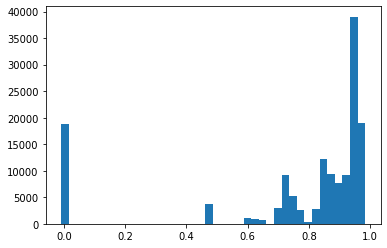

0.7577607826842996
0.7727326219608072


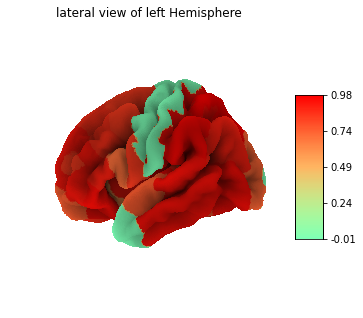

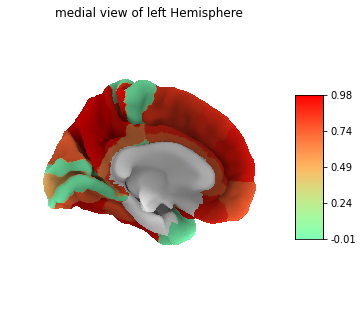

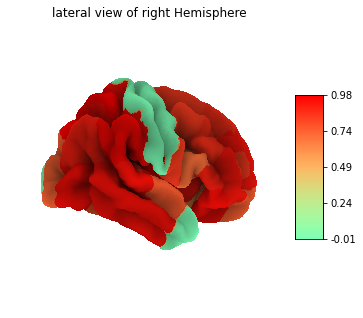

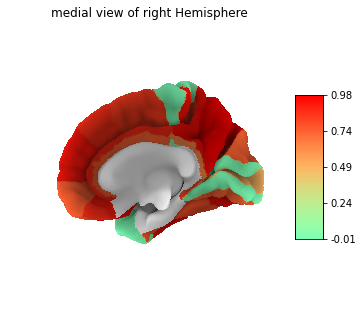

In [85]:
plot_cortex(column = 'r2.2', cmap = 'rainbow') #rainbow, hsv jet #bigbrain_layer_1


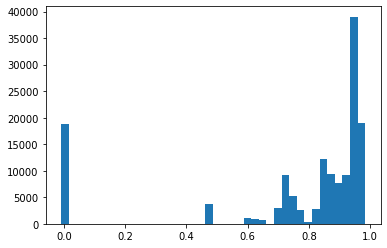

0.7577607826842996
0.7727326219608072


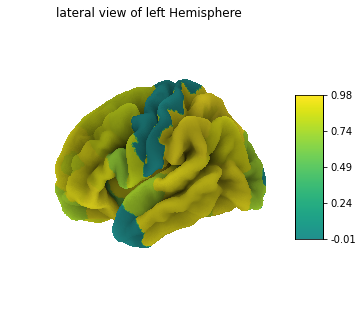

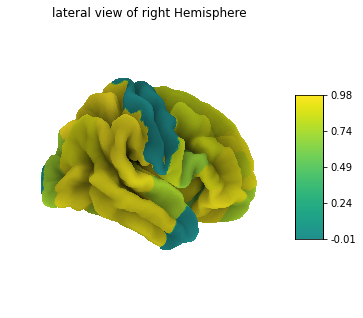

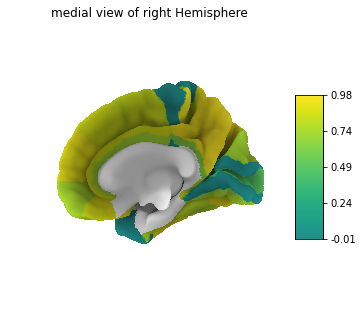

In [80]:
plot_cortex(column = 'r2.2', cmap = 'viridis', threshold = 0) #rainbow, hsv jet #bigbrain_layer_1


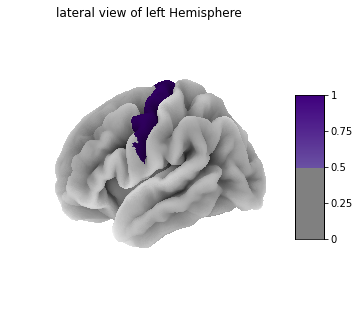

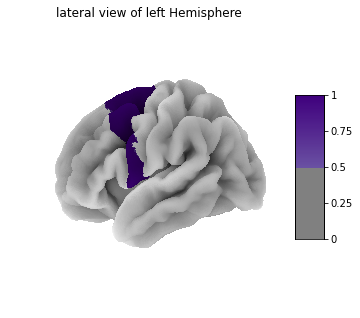

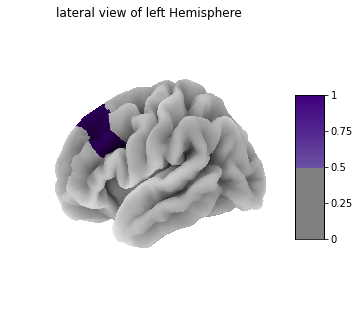

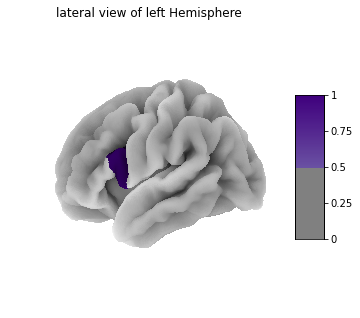

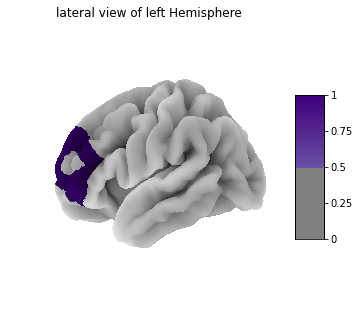

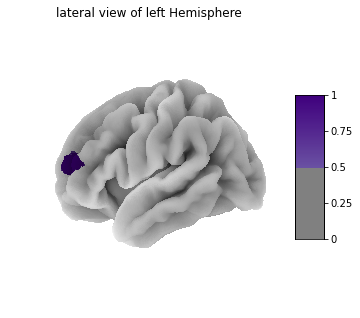

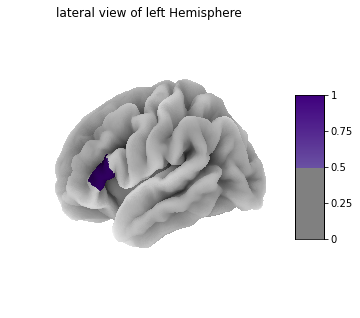

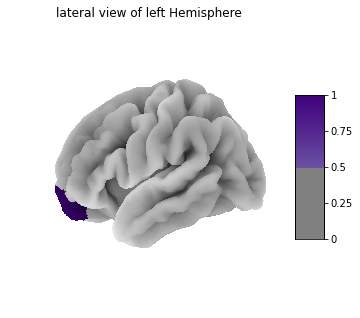

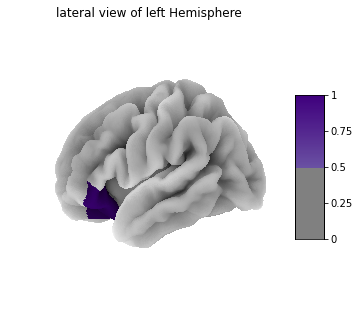

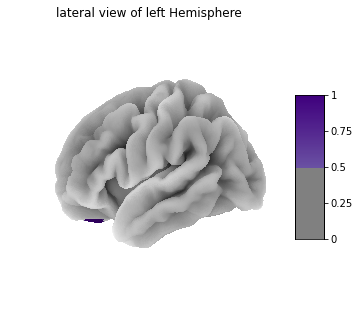

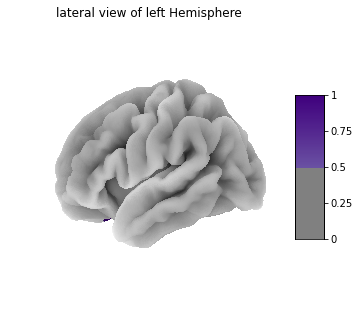

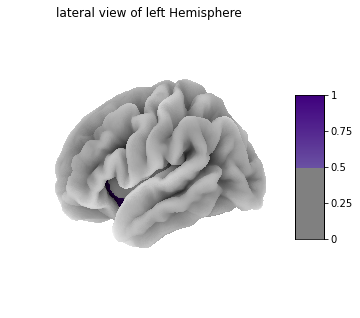

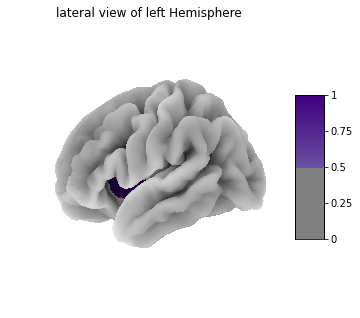

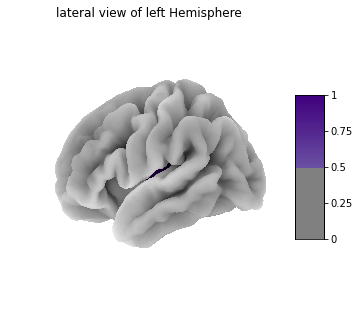

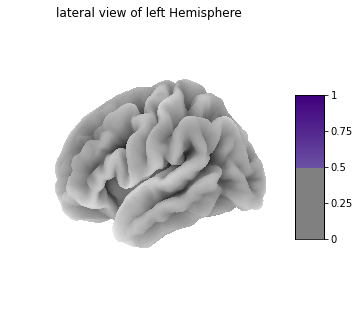

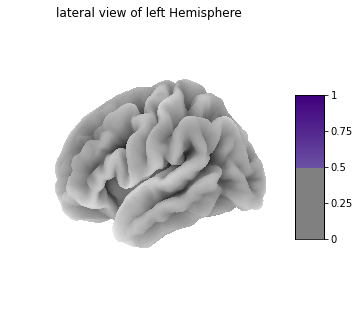

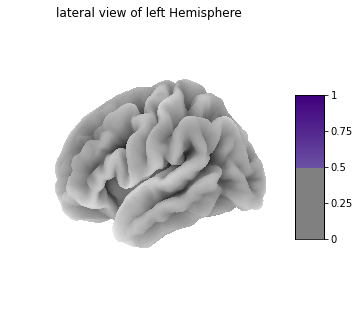

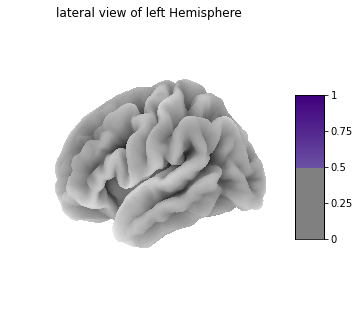

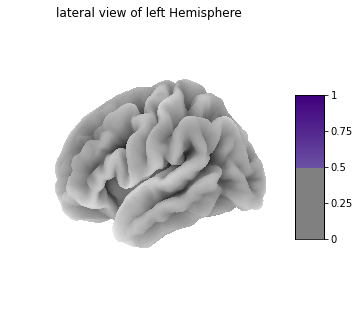

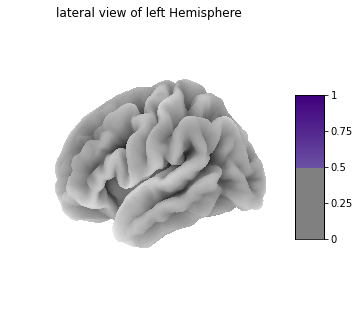

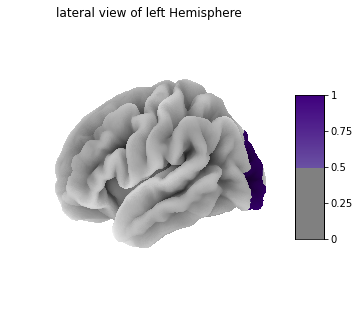

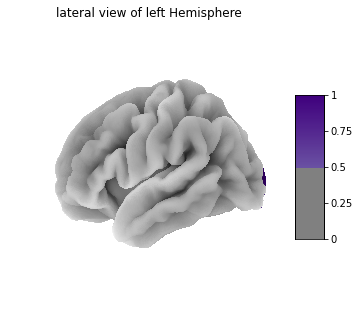

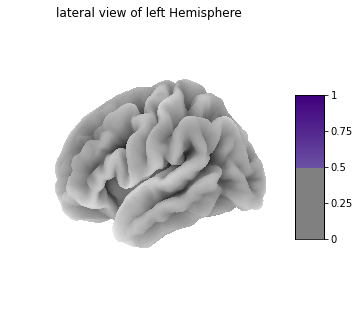

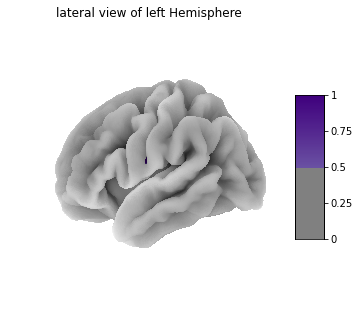

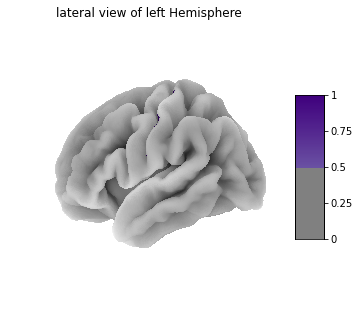

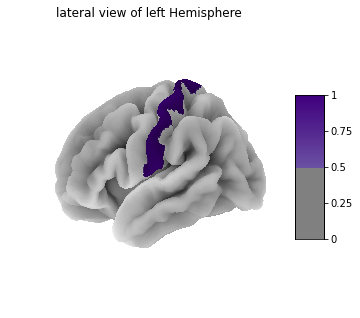

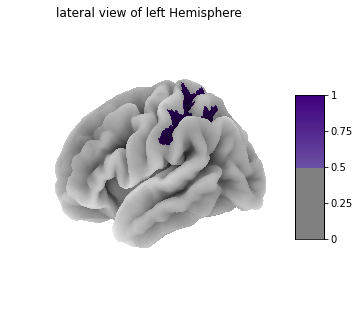

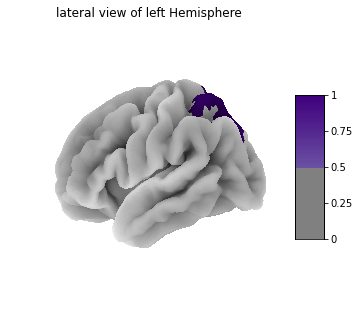

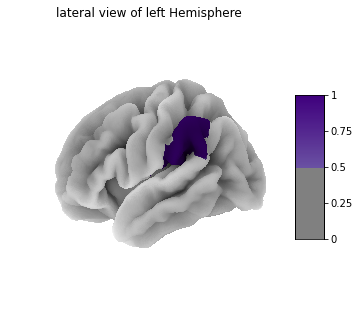

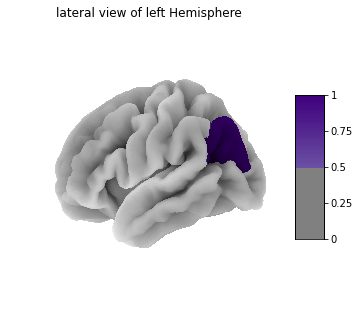

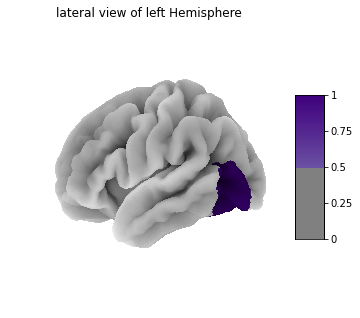

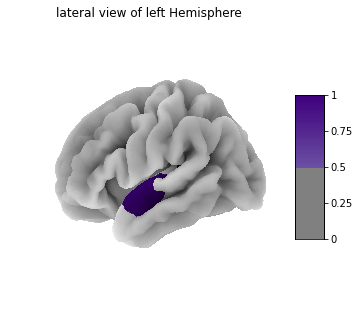

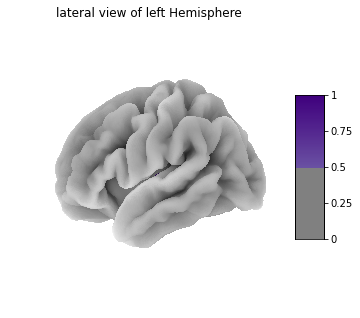

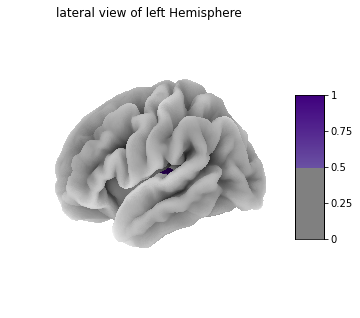

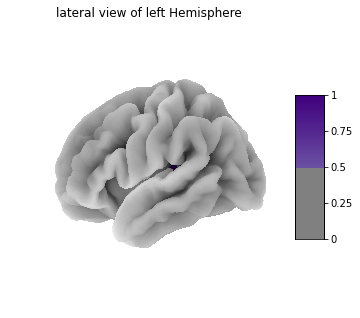

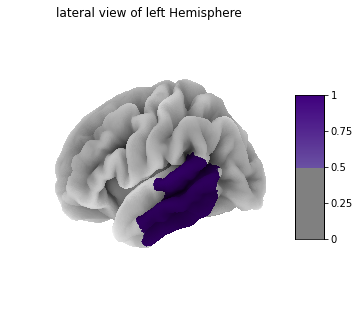

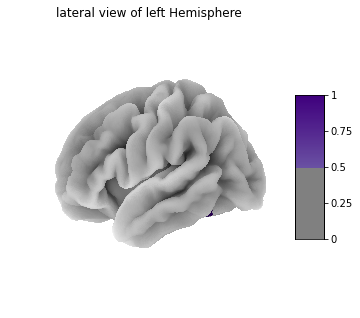

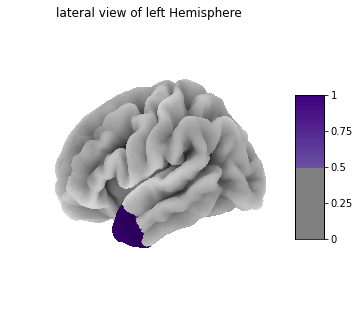

In [43]:
dummies_left = pd.get_dummies(result_left.struture)
for col in dummies_left.columns:

    for view in ['lateral']:
        plotting.plot_surf_stat_map(surf_mesh = fsaverage_mesh_left, 
                                          stat_map = np.array(dummies_left[col].astype(int)), #result_left[column]
                                          bg_map = fsaverage_sulc_left,
                                          hemi = 'left', 
                                          view = view,
                                          title = view +' view of left Hemisphere ',
                                          colorbar = True,
                                          cmap = 'Purples',
                                          symmetric_cbar = False,
                                          threshold=0.5,
                                          bg_on_data = True,
                                               ) 
        plotting.show()